## In this notebook we analyse the available datasets to determine which ones to use

In [128]:
# reload imported files automatically without restarting the kernel
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from lib import *

In [130]:
# config

sns.set()


In [131]:
df = pd.read_html("https://networks.skewed.de/")[0] # get a df of all networks on Netzschleuder

In [132]:
# create dataset filters
social_networks = df["Tags"].str.contains("Social")
unweighted = df["Tags"].str.contains("Unweighted")
undirected = df["Kind"] == "Undirected"
online = df["Tags"].str.contains("Online")
offline = df["Tags"].str.contains("Offline")

In [133]:
online_social_filter = (online & social_networks & unweighted & undirected)
offline_social_filter = (offline & social_networks & unweighted & undirected)

### We create filters for our categories that we compare

In [134]:
online_social = df[online_social_filter]
# filter df for social, unweighted, online, undirected networks
len(online_social)
print("Number of online social networks:", len(online_social))
online_social.head(3)

Number of online social networks: 15


,Name,Title,Nodes,Edges,$\left<k\right>$,$\sigma_k$,$\lambda_h$,$\tau$,$r$,$c$,$\oslash$,$S$,Kind,Mode,$n$,Tags
74,douban,Douban friendship network (2009),154908,327162,4.22000,11.75000,39.78000,103.63000,-0.18000,0.01000,9,1.00000,Undirected,Unipartite,1,Social Online Unweighted
82,ego_social,Ego networks in social media (2012),107614,12238285,227.45000,581.50000,1718.72000,110.57000,-0.08000,0.15000,6,1.00000,Undirected,Unipartite,143,Social Online Unweighted Metadata
96,facebook_friends,Maier Facebook friends (2014),362,1988,10.98000,10.83000,23.30000,78.68000,0.10000,0.51000,9,0.91000,Undirected,Unipartite,1,Social Online Unweighted Metadata


In [135]:
# filter df for social, unweighted, online, undirected networks
offline_social = df[social_networks & offline & unweighted & undirected]
print("Number of offline social networks:", len(offline_social))
online_social.head(3)

Number of offline social networks: 17


,Name,Title,Nodes,Edges,$\left<k\right>$,$\sigma_k$,$\lambda_h$,$\tau$,$r$,$c$,$\oslash$,$S$,Kind,Mode,$n$,Tags
74,douban,Douban friendship network (2009),154908,327162,4.22000,11.75000,39.78000,103.63000,-0.18000,0.01000,9,1.00000,Undirected,Unipartite,1,Social Online Unweighted
82,ego_social,Ego networks in social media (2012),107614,12238285,227.45000,581.50000,1718.72000,110.57000,-0.08000,0.15000,6,1.00000,Undirected,Unipartite,143,Social Online Unweighted Metadata
96,facebook_friends,Maier Facebook friends (2014),362,1988,10.98000,10.83000,23.30000,78.68000,0.10000,0.51000,9,0.91000,Undirected,Unipartite,1,Social Online Unweighted Metadata


### We compare the avaiable network types

In [153]:
online_social.agg({"Nodes": ["mean", "median", "std"], "Edges": ["mean", "median", "std"]}).style.format("{:.0f}").set_caption("Online Social networks")

,Nodes,Edges
mean,5082770,126652876
median,154908,2777419
std,16781456,464657993


In [151]:
offline_social.agg({"Nodes": ["mean", "median", "std"], "Edges": ["mean", "median", "std"]}).style.format("{:.0f}").set_caption("Offline Social networks")

,Nodes,Edges
mean,905,192800
median,180,20818
std,2617,416200


###  We check the network size distribution of available datasets

In this first linearly scaled plot, we can see that there is an extreme outlier present in the online
social network datasets.

In [138]:
sorted(online_social["Nodes"].to_numpy())

[362,
 5793,
 6410,
 69413,
 104103,
 107614,
 114324,
 154908,
 499610,
 623766,
 1085612,
 1402673,
 2523386,
 3935215,
 65608366]

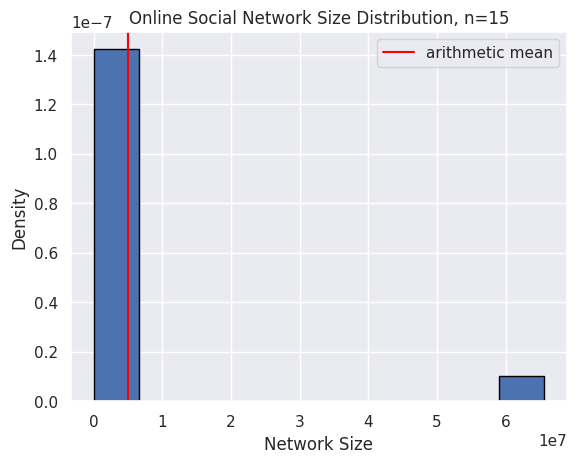

In [139]:
plot_distribution(
    online_social["Nodes"].to_numpy(),
    xlabel="Network Size",
    title="Online Social Network Size Distribution, n={}".format(len(online_social)),
)
plt.ticklabel_format(useOffset=False)

plot_vertical_line(online_social["Nodes"].mean(), "arithmetic mean")
plt.legend()

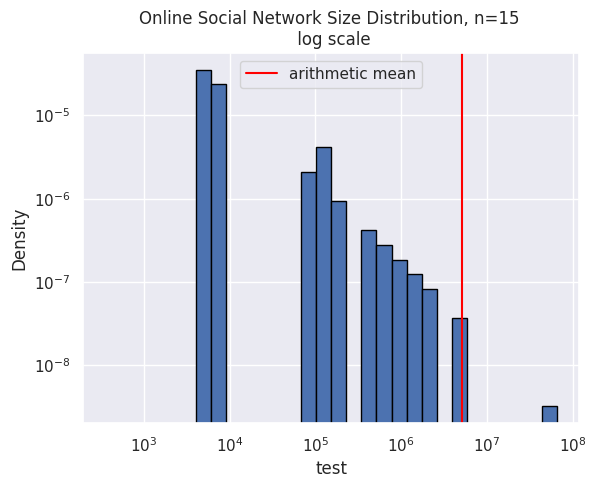

In [155]:
plot_distribution(
    online_social["Nodes"].to_numpy(),
    xlabel="test",
    title="Online Social Network Size Distribution, n={} \n log scale".format(len(online_social)),
    bins=logarithmic_bins(online_social["Nodes"].to_numpy(), 30),
    x_scale="log",
    y_scale="log",
)

plot_vertical_line(online_social["Nodes"].mean(), "arithmetic mean")
plt.legend()

### The available offline social networks are in generall smaller than online social networks

In [142]:
sorted(offline_social["Nodes"].to_numpy())

[22,
 34,
 35,
 47,
 62,
 75,
 96,
 113,
 180,
 185,
 274,
 329,
 372,
 403,
 800,
 1380,
 10972]

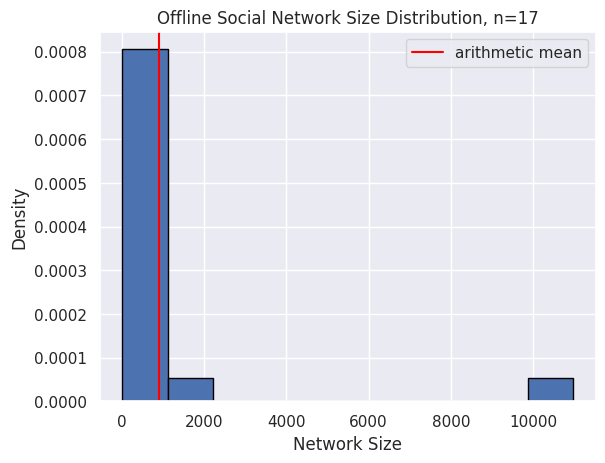

In [154]:
plot_distribution(
    offline_social["Nodes"].to_numpy(),
    xlabel="Network Size",
    title="Offline Social Network Size Distribution, n={}".format(len(offline_social)),
)
plt.ticklabel_format(useOffset=False)

plot_vertical_line(offline_social["Nodes"].mean(), "arithmetic mean")
plt.legend()